In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftfreq

from scipy.io.wavfile import write, read

In [2]:
from IPython.display import IFrame, display
file = 'Lectures/FFT.pdf'
IFrame(file, width=550, height=400)

In [3]:
#Definimos frecuencia
f = 1
fs = 6 # Medidas por segundos

In [4]:
# Vamos crear nuestra serie de tiempo

t = np.linspace(0.,1., 2*fs, endpoint=False)

# Tomemos una señal periodica

x = np.cos(2.*np.pi*f*t)

# Tomemos una no peridica

x1 = np.sin( np.sqrt(t) )

Text(0,0.5,'$tiempo[s]$')

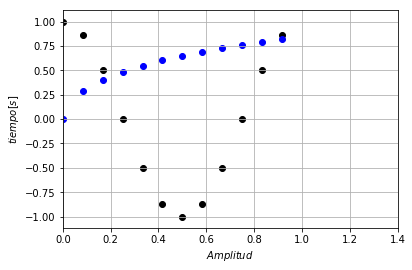

In [5]:
plt.figure()
plt.scatter(t,x, c='black')
plt.scatter(t,x1, c='blue')
plt.grid()
plt.xlim(0,1.4)
plt.xlabel(r'$Amplitud$')
plt.ylabel(r'$tiempo[s]$')

In [6]:
def GetFFT(x):
    
    Npoints = len(x)
    c = (2.0*np.pi)/len(x)
    
    fft = []
    
    
    for k in range(Npoints):
           
        Re = 0.
        Im = 0.
        
        for n in range(Npoints):
            
            Re += x[n]*np.cos( c*k*n )
            Im -= x[n]*np.sin( c*k*n )
    
        fft = np.append(fft, complex(Re, Im))
    
    return fft     

In [15]:
Xw = GetFFT(x)
print(Xw[0])

(-1.5543122344752192e-15+0j)


# FFT de numpy

In [16]:
Xw1 = fft(x)
print(Xw1[0])

(-1.3437100070024075e-15+0j)


In [11]:
# Implementar transformada inverse

def GetIFFT(x):
    
    Npoints = len(x)
    c = (2.0*np.pi)/len(x)
    
    ifft = []
     
    for k in range(Npoints):
           
        Re = 0.
        Im = 0.
        
        for n in range(Npoints):
            
            Re += x[n]*np.cos( c*k*n )
            Im += x[n]*np.sin( c*k*n )
    
        ifft = np.append(ifft, complex(Re, Im)/Npoints)
    
    return ifft  

In [17]:
Xt = ifft(Xw) # Regresando al dominio temporal
Xt1 = GetIFFT(Xw)

Text(0,0.5,'$tiempo[s]$')

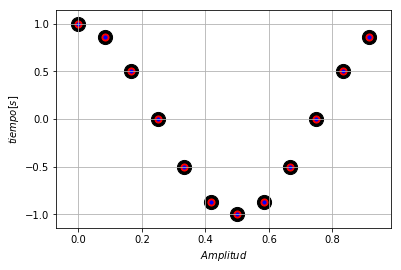

In [20]:
# Comparar resultados

plt.figure()
plt.scatter(t,x, c='black', s=200)
plt.scatter(t,Xt.real, c='red', s=50)
plt.scatter(t,Xt1.real, c='blue', s=10)
plt.grid()

plt.xlabel(r'$Amplitud$')
plt.ylabel(r'$tiempo[s]$')


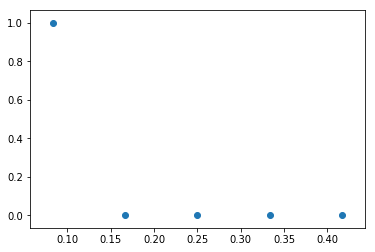

In [23]:
# Ver la transformada en el espacio de las frecuecias
N = len(Xw)
frecuencias = np.fft.fftfreq(N)

# Filtros

mask = frecuencias > 0.

plt.scatter(frecuencias[mask], 2.0*np.abs(Xw[mask])/N)

# Otros ejemplos

In [53]:
def Sampler(f, Npoints = 30, N_T=1):
    T = 2.0 * np.pi
    # calcular frecuencia angular
    omega = 2.0 * np.pi / T
    
    deltat = T/Npoints
    
    t = np.arange(Npoints) * deltat * N_T
    x = f(t)
    
    tModel = np.linspace(t.min(), t.max(), 1000)
    xModel = f( omega*tModel )
    
    return t,x,tModel,xModel

In [25]:
def f(t):
    return np.sin(t) + 2.0*np.sin(3*t) + 3*np.sin(5*t)

In [54]:
# Muestrear f(t)

t,x, tModel, xModel = Sampler(f)

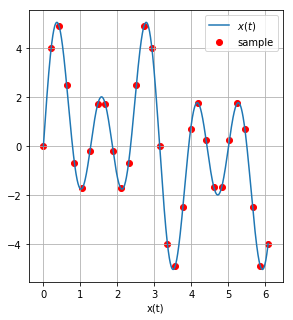

In [55]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.plot(tModel, xModel, label=r'$x(t)$')
plt.scatter(t,x, c='r' ,label='sample')
plt.xlabel(r't')
plt.xlabel(r'x(t)')
plt.grid()
plt.legend()

In [58]:
Xw = fft(x)
N = len(x)
frecuencias = np.fft.fftfreq(N)

Text(0.5,1,'N=15')

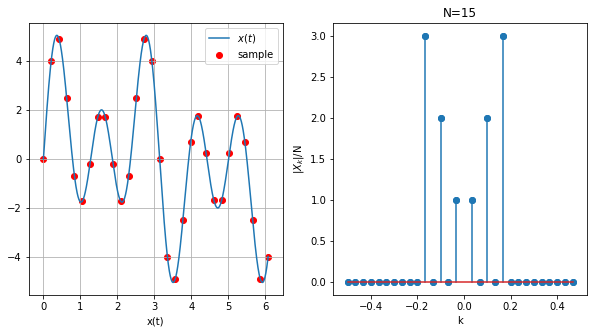

In [63]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.plot(tModel, xModel, label=r'$x(t)$')
plt.scatter(t,x, c='r' ,label='sample')
plt.xlabel(r't')
plt.xlabel(r'x(t)')
plt.grid()
plt.legend()

mask = frecuencias != 0.

plt.subplot(1,2,2)
plt.scatter(frecuencias[mask], 2.0*np.abs(Xw[mask]/N))
plt.stem(frecuencias[mask], 2.0*np.abs(Xw[mask]/N))
plt.xlabel('k')
plt.ylabel('|$X_k$|/N')
plt.title("N=15")

In [64]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html
# Wav format : 16-bit PCM
# min value: -32768
# max value: +32767
# numpy dtype: int16

## Señal armónica

In [65]:
# frecuencia

f = 440 

# Samplig rate

fs = 44100

# Amplitud max

Amax = 32767

In [66]:
t = np.linspace(0.,7.,2*fs, endpoint=False)
x = np.sin( 2.*np.pi*f *t)
print(x)

[ 0.          0.21765656  0.42487667 ... -0.6117243  -0.42487667
 -0.21765656]


In [68]:
# Vamos escalar la señal

scaled = np.int16( x*Amax )
print( scaled.min() ,scaled.max() )
write('Test440.wav',44100, scaled)

(-32766, 32766)


(0, 0.0125)

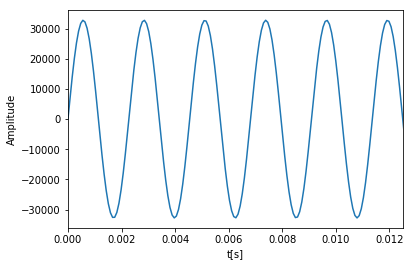

In [72]:
fig, ax = plt.subplots()
ax.plot(t,scaled)
ax.set_xlabel('t[s]')
ax.set_ylabel('Amplitude')
ax.set_xlim(0,1/80.)

(-22050, 22050)

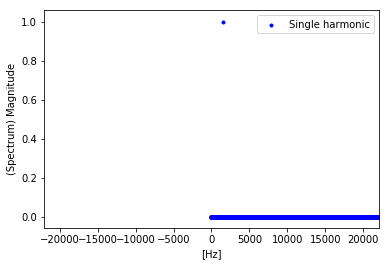

In [74]:
# Vamos a encontrar el espectro de frecuencias
X = fft(x)
X = X * 2 / len(x)
freqs = fftfreq(len(x)) * fs

mask = freqs >= 0

fig, ax = plt.subplots()
ax.scatter(freqs[mask], np.abs(X[mask]), 
           c="b", label="Single harmonic", marker=".")
ax.legend(loc=0)

ax.set_xlabel('[Hz]')
ax.set_ylabel('(Spectrum) Magnitude')
ax.set_xlim(-fs/2,fs/2)

## Señal mezclada

In [75]:
f0 = 440
fs = 44100 # Sampling rate

In [76]:
# Superponer varias señales
f = np.array([2.,3.,4.,8.,12.])
f *= f0
Amp = np.array([0.3,0.4,0.2,0.2,0.1])

In [79]:
t = np.linspace(0.,2.,2*fs, endpoint=False)
x = np.sin( 2.*np.pi*f0*t )

for i in range(len(f)):
    x += Amp[i]*np.sin(2.*np.pi*f[i]*t)

(0, 0.0125)

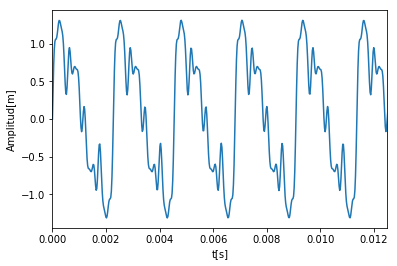

In [80]:
fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('t[s]')
ax.set_ylabel('Amplitud[m]')
ax.set_xlim(0,1./80.)

In [81]:
scaled = np.int16( x*Amax/np.max(np.abs(x)) )
write('Test_MixSignal.wav', 44100, scaled)

In [82]:
# Calculando las frecuencias

X = fft(x)
X = X * 2 /len(x)
frecuencias = fftfreq(len(x))*fs

In [92]:
# Aplicando las mascaras

mask = freqs < 2000

(0, 22050)

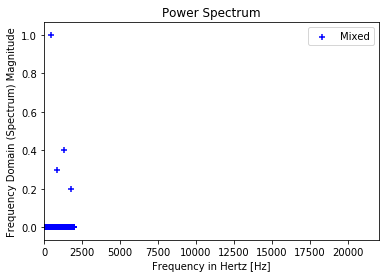

In [93]:
fig, ax = plt.subplots()
ax.scatter(frecuencias[mask], np.absolute(X[mask]), c="b", label="Mixed", marker="+")
ax.legend(loc=0)

ax.set_title('Power Spectrum')
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, fs/2)

# Sonido de la radiación cósmica de fondo

In [96]:
x = np.random.uniform(-1., 1., fs * 2)
scaled = np.int16(x*Amax)
write('Test_CosmicMicroBackground.wav', 44100, scaled)

(0.0, 200.0)

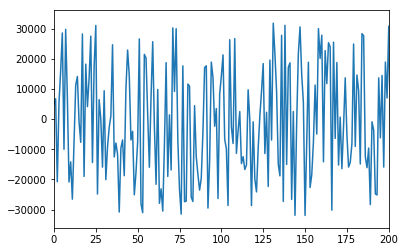

In [97]:
plt.plot(scaled)
plt.xlim(0.,200.)

In [98]:
# Calculando el espectro de frecuencias
# Calculando las frecuencias

X = fft(x)
X = X * 2 /len(x)
frecuencias = fftfreq(len(x))*fs

mask = frecuencias >= 0

(0, 0.02)

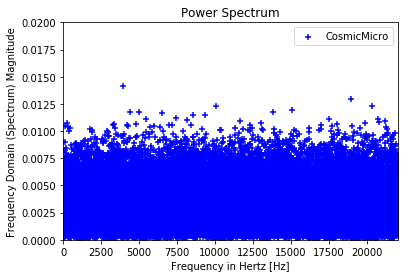

In [99]:
fig, ax = plt.subplots()
ax.scatter(frecuencias[mask], np.absolute(X[mask]), c="b", label="CosmicMicro", marker="+")
ax.legend(loc=0)

ax.set_title('Power Spectrum')
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, fs/2)
ax.set_ylim(0, 0.02)